# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [127]:
# Importar bibliotecas padrão (nenhuma neste caso)

# Importar bibliotecas de terceiros
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importar pacotes específicos de bibliotecas ou funções
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import r2_score

In [256]:
#01 - Crie a matriz de design (e a matriz y) utilizando o Patsy,  para um modelo em tip, explicada por sex, smoker, diner e net_bill.
#Carregar base de dados 'tips' do Seaborn
tips = sns.load_dataset('tips')

#Criar coluna de 'Gorjeta Percentual'
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

#Criar coluna de 'Gorjeta Líquida'
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [258]:
#Criar Modelo 1
modelo_1 = smf.ols('tip ~ sex + time + net_bill + smoker', data = tips).fit()
tips['res_1'] = modelo_1.resid

modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           2.64e-20
Time:                        16:48:10   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
#Criar Matriz Design
y, X = patsy.dmatrices('tip ~ sex + time + net_bill + smoker', data=tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  time[T.Dinner]  smoker[T.No]  net_bill
          1              1               1             1     15.98
          1              0               1             1      8.68
          1              0               1             1     17.51
          1              0               1             1     20.37
          1              1               1             1     20.98
          1              0               1             1     20.58
          1              0               1             1      6.77
          1              0               1             1     23.76
          1              0               1             1     13.08
          1              0               1             1     11.55
          1              0               1             1      8.56
          1              1               1             1     30.26
          1              0               1             1     13.85
          1              0   

In [262]:
#Criar Matriz y 
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [28]:
#02 - Remova as variáveis não significantes.
#Criar Modelo 2, removendo variáveis não significativas no Modelo 1
modelo_2 = smf.ols('tip ~ + smoker', data = tips).fit()
tips['res_2'] = modelo_2.resid

modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.008506
Date:                Sat, 14 Sep 2024   Prob (F-statistic):              0.927
Time:                        13:03:48   Log-Likelihood:                -424.95
No. Observations:                 244   AIC:                             853.9
Df Residuals:                     242   BIC:                             860.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.0087      0.144     20.927      0.000       2.726       3.292
smoker[T.No]    -0.0169      0.183     -0.092      0.927      -0.377       0.343
==============================================================================
Omnibus:                       79.337   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.973
Skew:                           1.456   Prob(JB):                     3.44e-47
Kurtosis:                       6.545   Cond. No.                         3.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

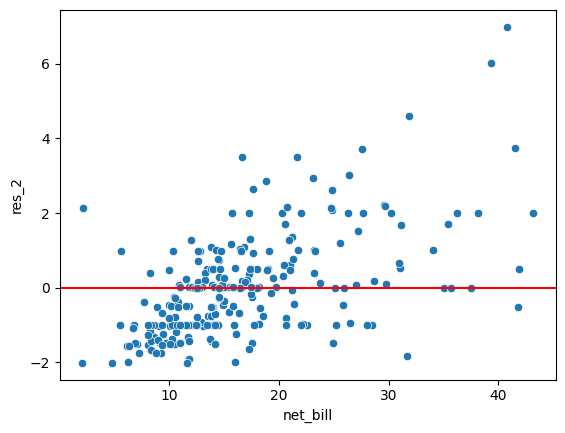

In [34]:
#03 - Observe o gráfico de resíduos em função de net_bill
# Plotar gráfico de resíduos em função da variável 'net_bill'
sns.scatterplot(x='net_bill', y='res_2', data=tips)
plt.axhline(y=0, color='r', linestyle='-')

A variável pode não ser uma boa preditora como está sendo modelada pois existe uma grande concentração de resíduos positivos quando o valor de net_bill está entre 10 e 25, o que indica que o modelo pode estar subestimando os valores reais nessa faixa.

In [92]:
#04 - Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.
#Criar Modelo 3 utilizando o log de net_bill
modelo_3 = smf.ols('tip ~ np.log(net_bill + 0.1)', data = tips).fit()
tips['res_3'] = modelo_3.resid

modelo_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           3.53e-20
Time:                        14:45:57   Log-Likelihood:                -382.18
No. Observations:                 244   AIC:                             768.4
Df Residuals:                     242   BIC:                             775.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.3160      0.434     -3.029      0.003      -2.172      -0.460
np.log(net_bill + 0.1)     1.5867      0.157     10.080      0.000       1.277       1.897
==============================================================================
Omnibus:                       73.292   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.595
Skew:                           1.294   Prob(JB):                     5.62e-48
Kurtosis:                       6.835   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
#Criar Modelo 4 utilizando um polinômio em net_bill
modelo_4 = smf.ols('tip ~ net_bill + np.power(net_bill,2)', data = tips).fit()
tips['res_4'] = modelo_4.resid

modelo_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           4.96e-22
Time:                        14:46:06   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O Modelo 4, modelo em que a variável x foi tansformada com um polinômio de segundo grau em 'net_bill', seria o melhor modelo pois explica 33,4% das observações enquando que o Modelo 3, modelo em que a variável x foi tansformada com o log de 'net_bill', explica 29,6% das observações. 

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [96]:
#01 - Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, explicado por sex, smoker, diner e net_bill.
#Criar Modelo 5
modelo_5 = smf.ols('np.log(tip + 0.1) ~ sex + time + net_bill + smoker', data = tips).fit()
tips['res_5'] = modelo_5.resid

modelo_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(tip + 0.1)   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     27.45
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           9.30e-19
Time:                        14:46:52   Log-Likelihood:                -87.802
No. Observations:                 244   AIC:                             185.6
Df Residuals:                     239   BIC:                             203.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5088      0.075      6.817      0.000       0.362       0.656
sex[T.Female]      0.0050      0.048      0.105      0.917      -0.090       0.100
time[T.Dinner]     0.0191      0.052      0.368      0.713      -0.083       0.121
smoker[T.No]       0.0419      0.046      0.902      0.368      -0.050       0.133
net_bill           0.0293      0.003     10.187      0.000       0.024       0.035
==============================================================================
Omnibus:                        2.018   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.684
Skew:                          -0.148   Prob(JB):                        0.431
Kurtosis:                       3.280   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
#Criar Matriz Design
y, X = patsy.dmatrices('np.log(tip + 0.1) ~ sex + time + net_bill + smoker', data = tips)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  time[T.Dinner]  smoker[T.No]  net_bill
          1              1               1             1     15.98
          1              0               1             1      8.68
          1              0               1             1     17.51
          1              0               1             1     20.37
          1              1               1             1     20.98
          1              0               1             1     20.58
          1              0               1             1      6.77
          1              0               1             1     23.76
          1              0               1             1     13.08
          1              0               1             1     11.55
          1              0               1             1      8.56
          1              1               1             1     30.26
          1              0               1             1     13.85
          1              0   

In [100]:
#Criar Matriz Design
y

DesignMatrix with shape (244, 1)
  np.log(tip + 0.1)
            0.10436
            0.56531
            1.28093
            1.22671
            1.31103
            1.57070
            0.74194
            1.16938
            0.72271
            1.20297
            0.59333
            1.62924
            0.51282
            1.13140
            1.13783
            1.39128
            0.57098
            1.33763
            1.28093
            1.23837
            1.43031
            1.04732
            0.84587
            2.03862
            1.18784
            0.89200
            0.74194
            0.74194
            1.48160
            1.13140
  [214 rows omitted]
  Terms:
    'np.log(tip + 0.1)' (column 0)
  (to view full data, use np.asarray(this_obj))

In [102]:
#02 - Remova as variáveis não significantes.
#Criar Modelo 6
modelo_6 = smf.ols('np.log(tip + 0.1) ~ smoker + net_bill', data = tips).fit()
tips['res_6'] = modelo_6.resid

modelo_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(tip + 0.1)   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     55.26
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           1.77e-20
Time:                        14:47:16   Log-Likelihood:                -87.872
No. Observations:                 244   AIC:                             181.7
Df Residuals:                     241   BIC:                             192.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5223      0.061      8.497      0.000       0.401       0.643
smoker[T.No]     0.0412      0.046      0.891      0.374      -0.050       0.132
net_bill         0.0294      0.003     10.512      0.000       0.024       0.035
==============================================================================
Omnibus:                        1.785   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.454
Skew:                          -0.136   Prob(JB):                        0.483
Kurtosis:                       3.263   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

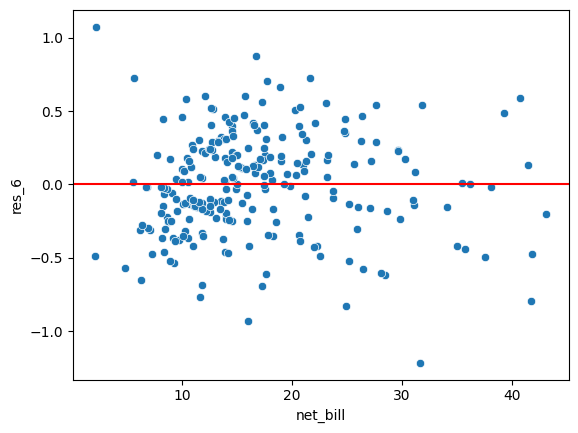

In [104]:
#Plotar gráfico para visualizar os resíduos
sns.scatterplot(x='net_bill', y='res_6', data=tips)
plt.axhline(y=0, color='r', linestyle='-')

A variável explica 31,4% das observações, o que é uma explicação razoável, mas há espaço para melhorias. Os resíduos dispersos no gráfico sugerem que o modelo tem dificuldades específicas em prever as gorjetas corretamente para valores de net_bill nessa faixa de 10 a 20, o que pode ser um sinal de que o modelo não está ajustado de forma ótima para capturar todas as nuances da relação entre essas variáveis.

In [107]:
#Criar Modelo 7 utilizando o log de net_bill
modelo_7 = smf.ols('np.log(tip+0.1) ~ smoker + np.log(net_bill+0.1)', data = tips).fit()
tips['res_7'] = modelo_7.resid

modelo_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(tip + 0.1)   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     56.76
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           6.34e-21
Time:                        14:49:55   Log-Likelihood:                -86.834
No. Observations:                 244   AIC:                             179.7
Df Residuals:                     241   BIC:                             190.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.3304      0.134     -2.466      0.014      -0.594      -0.066
smoker[T.No]               0.0150      0.046      0.326      0.744      -0.075       0.105
np.log(net_bill + 0.1)     0.5013      0.047     10.654      0.000       0.409       0.594
==============================================================================
Omnibus:                       13.288   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.727
Skew:                           0.187   Prob(JB):                     5.78e-07
Kurtosis:                       4.639   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
#Criar Modelo 8 utilizando um polinômio em net_bill
modelo_8 = smf.ols('np.log(tip+0.1) ~ smoker + I(net_bill+np.power(net_bill,2))', data = tips).fit()
tips['res_8'] = modelo_8.resid

modelo_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(tip + 0.1)   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     41.63
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           2.96e-16
Time:                        14:54:28   Log-Likelihood:                -97.719
No. Observations:                 244   AIC:                             201.4
Df Residuals:                     241   BIC:                             211.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.7978      0.046     17.200      0.000       0.706       0.889
smoker[T.No]                            0.0473      0.048      0.980      0.328      -0.048       0.142
I(net_bill + np.power(net_bill, 2))     0.0006   6.49e-05      9.124      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.267   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.334
Skew:                          -0.168   Prob(JB):                        0.513
Kurtosis:                       2.866   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
#05 - Do modelo final deste item, calcule o r - quadrado na escala de tip (sem o log). 
#Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

dados = tips[0:5]

#R-Quadrado Modelo 4
modelo_4.predict(dados)
modelo_4_rq = modelo_4.rsquared
print(f'R-Quadrado do Modelo 4 é {modelo_4_rq}.')

#R-Quadrado Modelo 8
pred_log = modelo_8.predict(dados)
pred_orig = np.exp(pred_log) - 0.1
modelo_8_rq = r2_modelo_8 = r2_score(tips['tip'][:5], pred_orig)
print(f'R-Quadrado do Modelo 8 é {modelo_8_rq}.')

R-Quadrado do Modelo 4 é 0.3344216007656947.
R-Quadrado do Modelo 8 é 0.25173019356183324.


O Modelo 4 apresenta um coeficiente de determinação (R²) de 0,334, ou seja, explica aproximadamente 33,4% da variação nos dados de tip para o conjunto de dados considerado. Por outro lado, o Modelo 8 possui um coeficiente de determinação (R²) de 0,251, indicando que ele explica cerca de 25,1% da variação nos dados.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [135]:
#Carregar base de dados
renda_raw = pd.read_csv('m12_income_prediction.csv')
renda_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [137]:
#Data Wrangling - Structuring
renda_raw['data_ref'] = pd.to_datetime(renda_raw['data_ref'])
renda_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15000 non-null  int64         
 1   data_ref               15000 non-null  datetime64[ns]
 2   index                  15000 non-null  int64         
 3   sexo                   15000 non-null  object        
 4   posse_de_veiculo       15000 non-null  bool          
 5   posse_de_imovel        15000 non-null  bool          
 6   qtd_filhos             15000 non-null  int64         
 7   tipo_renda             15000 non-null  object        
 8   educacao               15000 non-null  object        
 9   estado_civil           15000 non-null  object        
 10  tipo_residencia        15000 non-null  object        
 11  idade                  15000 non-null  int64         
 12  tempo_emprego          12466 non-null  float64       
 13  q

In [155]:
#Data Wrangling - Cleaning
renda = renda_raw.dropna()
renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12466 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             12466 non-null  int64         
 1   data_ref               12466 non-null  datetime64[ns]
 2   index                  12466 non-null  int64         
 3   sexo                   12466 non-null  object        
 4   posse_de_veiculo       12466 non-null  bool          
 5   posse_de_imovel        12466 non-null  bool          
 6   qtd_filhos             12466 non-null  int64         
 7   tipo_renda             12466 non-null  object        
 8   educacao               12466 non-null  object        
 9   estado_civil           12466 non-null  object        
 10  tipo_residencia        12466 non-null  object        
 11  idade                  12466 non-null  int64         
 12  tempo_emprego          12466 non-null  float64       
 13  qt_pes

In [157]:
#01 - Ajuste um modelo de regressão linear simples para explicar renda como variável resposta, por tempo_emprego como variável explicativa. 
# Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

modelo_1r = smf.ols('renda ~ tempo_emprego', data=renda).fit()
modelo_1r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:39:45   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/var/folders/b8/t8l0qnmd7gxc_jyyl4pk0hth0000gn/T/ipykernel_59222/1032947952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['res_m1r'] = modelo_1r.resid


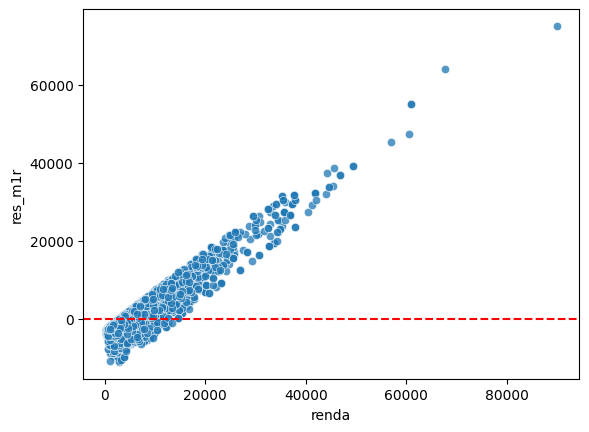

In [151]:
#02 - Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
renda['res_m1r'] = modelo_1r.resid

#Plotar gráfico para visualizar os resíduos
sns.scatterplot(x = 'renda', y = 'res_m1r', data = renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [199]:
modelo_2r = smf.ols('renda ~ np.log(tempo_emprego)', data=renda).fit()
modelo_2r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1123.
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          7.66e-236
Time:                        16:14:01   Log-Likelihood:            -1.2301e+05
No. Observations:               12466   AIC:                         2.460e+05
Df Residuals:                   12464   BIC:                         2.460e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2612.1692     78.783     33.156      0.000    2457.742    2766.597
np.log(tempo_emprego)  1372.2043     40.946     33.513      0.000    1291.945    1452.464
==============================================================================
Omnibus:                    10410.764   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           437896.454
Skew:                           3.782   Prob(JB):                         0.00
Kurtosis:                      31.033   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/var/folders/b8/t8l0qnmd7gxc_jyyl4pk0hth0000gn/T/ipykernel_59222/3451254762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['res_m2r'] = modelo_2r.resid


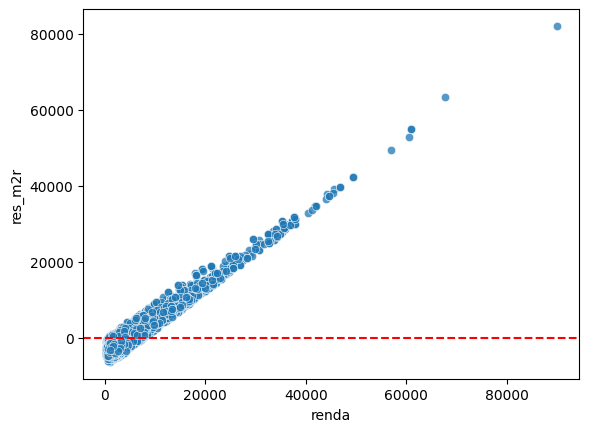

In [201]:
renda['res_m2r'] = modelo_2r.resid

#Plotar gráfico para visualizar os resíduos
sns.scatterplot(x = 'renda', y = 'res_m2r', data = renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [203]:
modelo_3r = smf.ols('renda ~ tempo_emprego + np.power(tempo_emprego, 2)', data=renda).fit()
modelo_3r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1258.
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:16:54   Log-Likelihood:            -1.2240e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12463   BIC:                         2.448e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3407.0877     81.730     41.687      0.000    3246.885    3567.291
tempo_emprego                 87.0286     15.488      5.619      0.000      56.669     117.388
np.power(tempo_emprego, 2)     7.2469      0.529     13.699      0.000       6.210       8.284
==============================================================================
Omnibus:                     9723.560   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           345767.284
Skew:                           3.454   Prob(JB):                         0.00
Kurtosis:                      27.859   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/var/folders/b8/t8l0qnmd7gxc_jyyl4pk0hth0000gn/T/ipykernel_59222/4251662076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['res_m3r'] = modelo_3r.resid


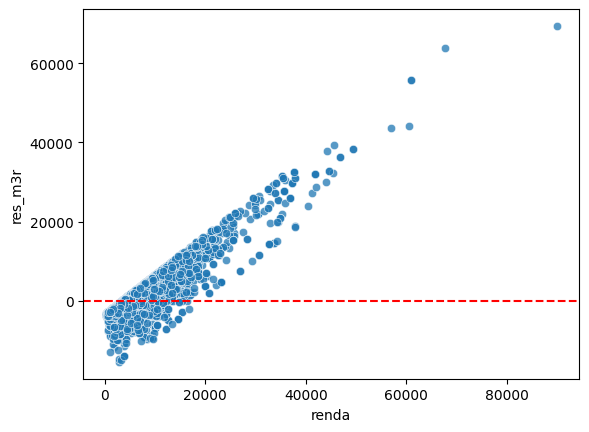

In [205]:
renda['res_m3r'] = modelo_3r.resid

#Plotar gráfico para visualizar os resíduos
sns.scatterplot(x = 'renda', y = 'res_m3r', data = renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [209]:
modelo_4r = smf.ols('np.log(renda) ~ tempo_emprego', data=renda).fit()
modelo_4r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:18:30   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8074      0.010    774.002      0.000       7.788       7.827
tempo_emprego     0.0449      0.001     45.802      0.000       0.043       0.047
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                3.050
Skew:                           0.034   Prob(JB):                        0.218
Kurtosis:                       3.037   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/var/folders/b8/t8l0qnmd7gxc_jyyl4pk0hth0000gn/T/ipykernel_59222/2685166629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['res_m4r'] = modelo_4r.resid


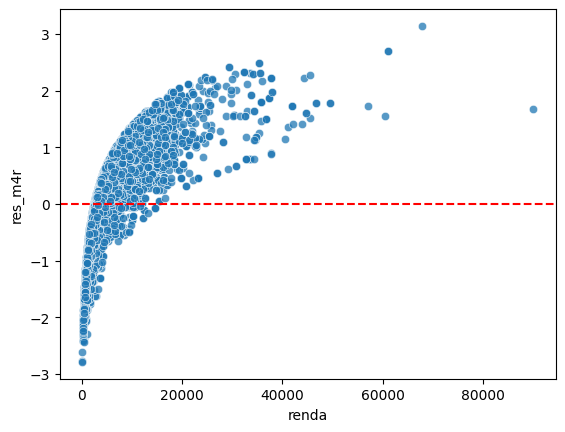

In [211]:
renda['res_m4r'] = modelo_4r.resid

#Plotar gráfico para visualizar os resíduos
sns.scatterplot(x = 'renda', y = 'res_m4r', data = renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [219]:
modelo_5r = smf.ols('renda ~ center(tempo_emprego)', data=renda).fit()
modelo_5r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:20:49   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4850.0453     40.113    120.909      0.000    4771.417    4928.673
center(tempo_emprego)   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         6.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As transformações vistas no módulo não parecem exercer grande efeito na regressão linear simples. 

In [224]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12466 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             12466 non-null  int64         
 1   data_ref               12466 non-null  datetime64[ns]
 2   index                  12466 non-null  int64         
 3   sexo                   12466 non-null  object        
 4   posse_de_veiculo       12466 non-null  bool          
 5   posse_de_imovel        12466 non-null  bool          
 6   qtd_filhos             12466 non-null  int64         
 7   tipo_renda             12466 non-null  object        
 8   educacao               12466 non-null  object        
 9   estado_civil           12466 non-null  object        
 10  tipo_residencia        12466 non-null  object        
 11  idade                  12466 non-null  int64         
 12  tempo_emprego          12466 non-null  float64       
 13  qt_pes

In [226]:
#03 - Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.
modelo_6r = smf.ols('''renda ~ sexo 
                                  + posse_de_veiculo 
                                  + posse_de_imovel 
                                  + qtd_filhos 
                                  + tipo_renda 
                                  + educacao 
                                  + estado_civil 
                                  + tipo_residencia 
                                  + idade 
                                  + tempo_emprego 
                                  + qt_pessoas_residencia 
                                  + mau
                                  + renda
                    ''', data=renda).fit()
modelo_6r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.596e+32
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:29:55   Log-Likelihood:             3.0677e+05
No. Observations:               12466   AIC:                        -6.135e+05
Df Residuals:                   12439   BIC:                        -6.133e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -4.903e-12   1.94e-12     -2.531      0.011    -8.7e-12   -1.11e-12
sexo[T.M]                         5.716e-12   1.05e-13     54.557      0.000    5.51e-12    5.92e-12
posse_de_veiculo[T.True]          1.065e-12   9.79e-14     10.870      0.000    8.73e-13    1.26e-12
posse_de_imovel[T.True]           1.579e-13   9.65e-14      1.636      0.102   -3.13e-14    3.47e-13
tipo_renda[T.Bolsista]            1.991e-12   2.49e-12      0.799      0.424   -2.89e-12    6.88e-12
tipo_renda[T.Empresário]          5.568e-13   1.05e-13      5.316      0.000    3.51e-13    7.62e-13
tipo_renda[T.Pensionista]         1.184e-11   1.69e-12      7.019      0.000    8.53e-12    1.51e-11
tipo_renda[T.Servidor público]    3.674e-12   1.51e-13     24.338      0.000    3.38e-12    3.97e-12
educacao[T.Pós graduação]         6.152e-12   1.25e-12      4.922      0.000     3.7e-12     8.6e-12
educacao[T.Secundário]           -8.487e-13   5.06e-13     -1.677      0.094   -1.84e-12    1.43e-13
educacao[T.Superior completo]    -3.161e-12   5.08e-13     -6.220      0.000   -4.16e-12   -2.16e-12
educacao[T.Superior incompleto]  -2.093e-12   5.44e-13     -3.845      0.000   -3.16e-12   -1.03e-12
estado_civil[T.Separado]         -2.573e-12   9.33e-13     -2.759      0.006    -4.4e-12   -7.45e-13
estado_civil[T.Solteiro]         -1.728e-12   9.16e-13     -1.887      0.059   -3.52e-12    6.72e-14
estado_civil[T.União]             1.461e-13   1.66e-13      0.879      0.379    -1.8e-13    4.72e-13
estado_civil[T.Viúvo]            -2.634e-12   9.58e-13     -2.750      0.006   -4.51e-12   -7.56e-13
tipo_residencia[T.Casa]             6.1e-12    3.8e-13     16.058      0.000    5.36e-12    6.85e-12
tipo_residencia[T.Com os pais]    4.231e-12   4.26e-13      9.930      0.000     3.4e-12    5.07e-12
tipo_residencia[T.Comunitário]    6.575e-12   7.33e-13      8.969      0.000    5.14e-12    8.01e-12
tipo_residencia[T.Estúdio]        6.302e-12   6.33e-13      9.958      0.000    5.06e-12    7.54e-12
tipo_residencia[T.Governamental]  9.606e-12   4.59e-13     20.912      0.000    8.71e-12    1.05e-11
mau[T.True]                      -3.899e-13   2.96e-13     -1.318      0.187    -9.7e-13     1.9e-13
qtd_filhos                        1.299e-12   9.13e-13      1.422      0.155   -4.91e-13    3.09e-12
idade                             5.647e-14   5.57e-15     10.144      0.000    4.56e-14    6.74e-14
tempo_emprego                     1.171e-13   7.75e-15     15.106      0.000    1.02e-13    1.32e-13
qt_pessoas_residencia            -3.006e-12   9.12e-13     -3.297      0.001   -4.79e-12   -1.22e-12
renda                                1.0000   1.04e-17   9.65e+16      0.000       1.000       1.000
=====================================================

In [250]:
#04 - Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
modelo_7r = smf.ols('''renda ~ posse_de_veiculo 
                                  + tipo_residencia 
                                  + tempo_emprego 
                                  + qt_pessoas_residencia 
                                  + renda
                    ''', data=renda).fit()
modelo_7r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.614e+33
Date:                Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:36:00   Log-Likelihood:             3.0797e+05
No. Observations:               12466   AIC:                        -6.159e+05
Df Residuals:                   12456   BIC:                        -6.159e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          9.08e-12   3.57e-13     25.437      0.000    8.38e-12    9.78e-12
posse_de_veiculo[T.True]         -2.214e-12   8.31e-14    -26.632      0.000   -2.38e-12   -2.05e-12
tipo_residencia[T.Casa]          -6.018e-12   3.43e-13    -17.521      0.000   -6.69e-12   -5.34e-12
tipo_residencia[T.Com os pais]   -6.818e-12   3.85e-13    -17.723      0.000   -7.57e-12   -6.06e-12
tipo_residencia[T.Comunitário]   -1.121e-11   6.63e-13    -16.904      0.000   -1.25e-11   -9.91e-12
tipo_residencia[T.Estúdio]       -1.418e-12   5.72e-13     -2.480      0.013   -2.54e-12   -2.97e-13
tipo_residencia[T.Governamental] -1.125e-11   4.15e-13    -27.124      0.000   -1.21e-11   -1.04e-11
tempo_emprego                     1.137e-13   6.56e-15     17.338      0.000    1.01e-13    1.27e-13
qt_pessoas_residencia            -4.602e-13   4.28e-14    -10.763      0.000   -5.44e-13   -3.76e-13
renda                                1.0000   9.07e-18    1.1e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                     7494.842   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           141161.199
Skew:                           2.536   Prob(JB):                         0.00
Kurtosis:                      18.686   Cond. No.                     1.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A remoção das variáveis estatisticamente insignificantes não alterou o coeficiente de determinação do quando comparamos os modelos 6 e 7. Entretanto, a manutenção de um R² de 1.000 pode ser um indicativo de overfitting (sobreajuste), já que um modelo com R² igual a 1 sugere que ele está explicando 100% da variação nos dados. Acredito que necessita técnicas mais avançadas de tratamento de dados para uma predição de boa qualidade. 

/var/folders/b8/t8l0qnmd7gxc_jyyl4pk0hth0000gn/T/ipykernel_59222/1246238901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['res_m7r'] = modelo_7r.resid


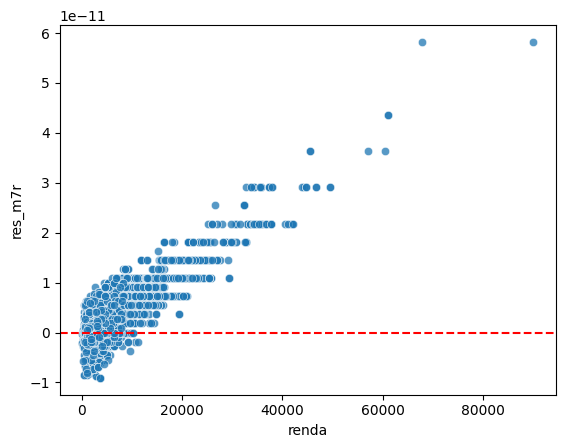

In [248]:
#05 - Faça uma análise de resíduos. Avalie a qualidade do ajuste.
renda['res_m7r'] = modelo_7r.resid

#Plotar gráfico para visualizar os resíduos
sns.scatterplot(x = 'renda', y = 'res_m7r', data = renda, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

O gráfico dos resíduos do Modelo 7 pela Renda indica claramente que o modelo não está equilibrado. Essa variação sistemática nos resíduos é uma característica comum em modelos que sofrem de overfitting, como indicado pelo R² de 1.000, confirmando a hipotese levantada anteriormente.